In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train = pd.read_csv('/content/house-price-prediction/data/train.csv')
test = pd.read_csv('/content/house-price-prediction/data/test.csv')

print(train.shape)
train.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

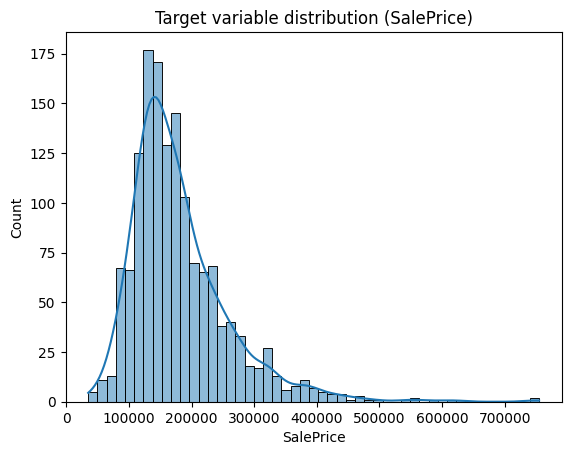

In [7]:
# Info & missing values
print(train.info())

# Missing values count
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

# Summary stats of numerical features
print(train.describe())

# Target distribution
sns.histplot(train['SalePrice'], kde=True)
plt.title("Target variable distribution (SalePrice)")
plt.show()


In [8]:
num_feats = train.select_dtypes(include=[np.number]).columns.tolist()
cat_feats = train.select_dtypes(include=[object]).columns.tolist()

print(f"Numerical features ({len(num_feats)}): {num_feats}")
print(f"Categorical features ({len(cat_feats)}): {cat_feats}")


Numerical features (38): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical features (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional'

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


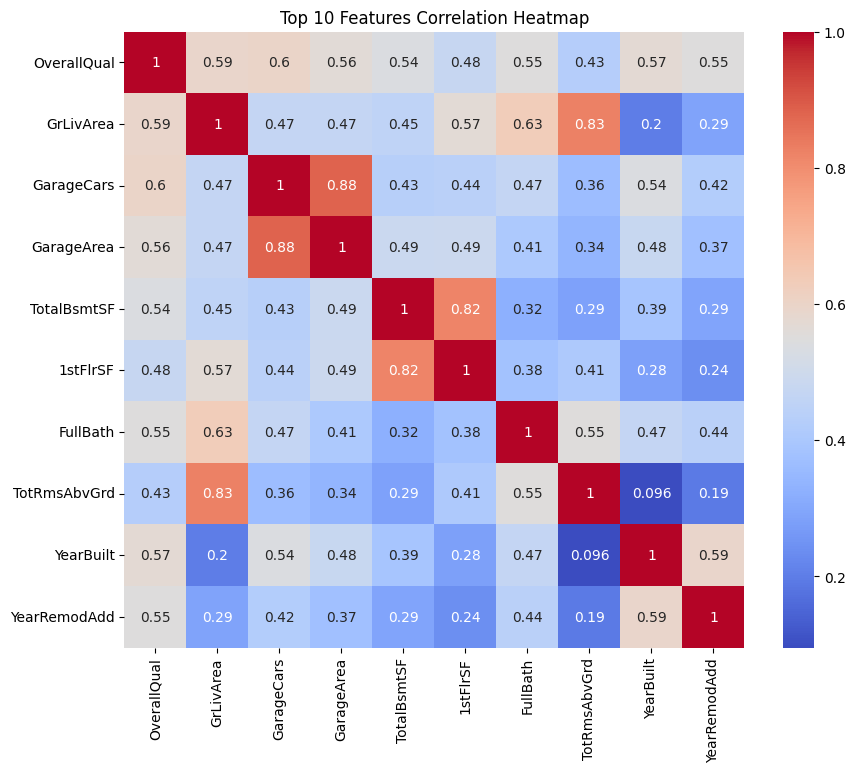

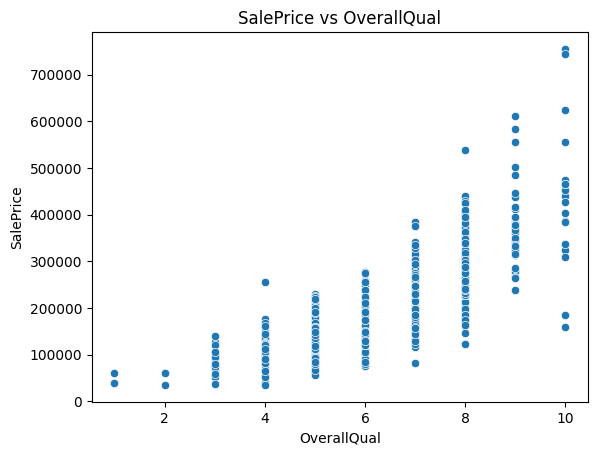

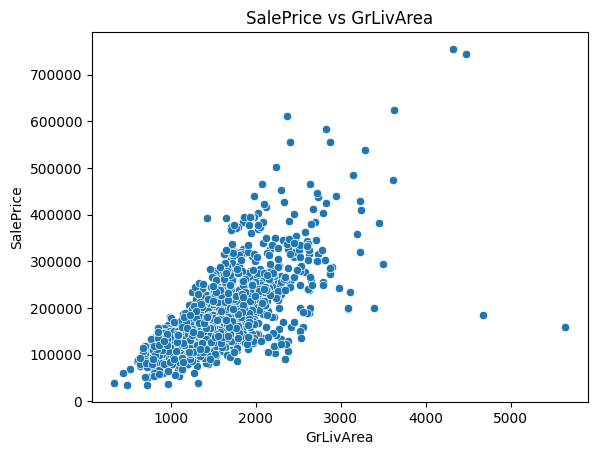

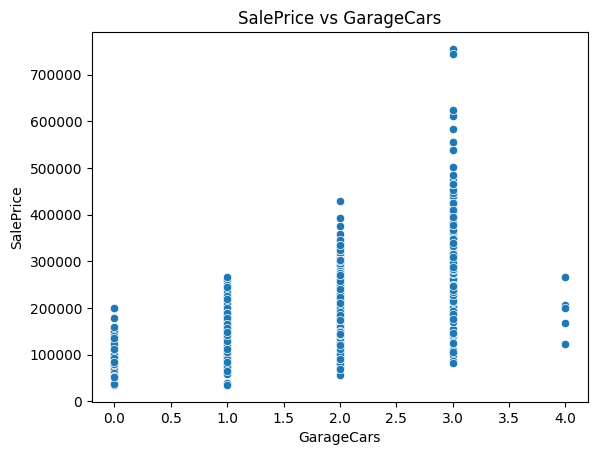

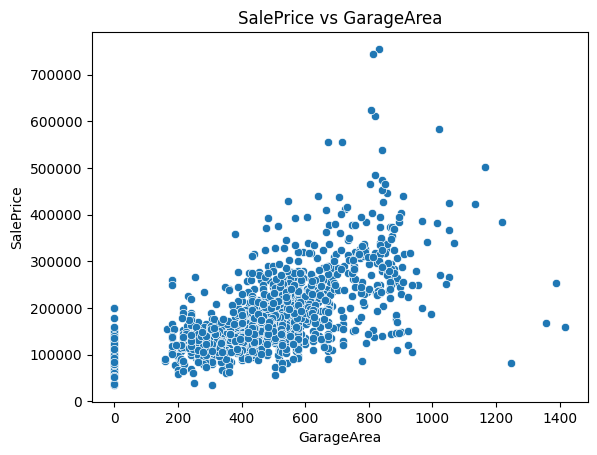

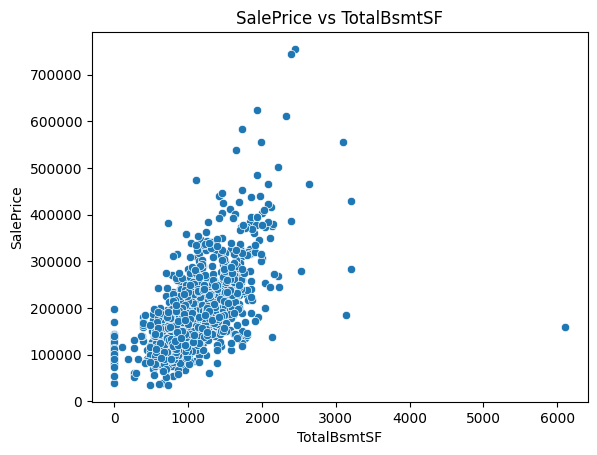

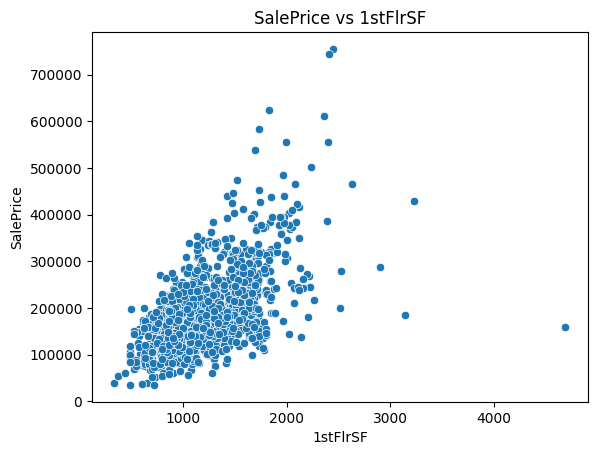

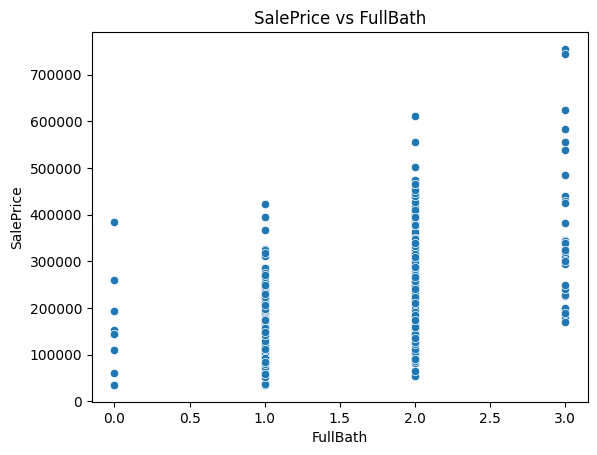

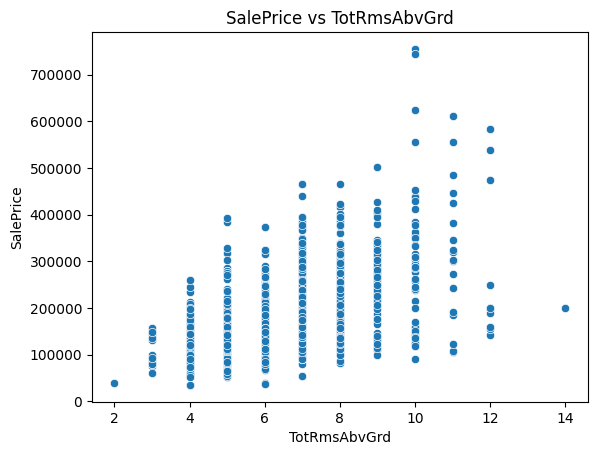

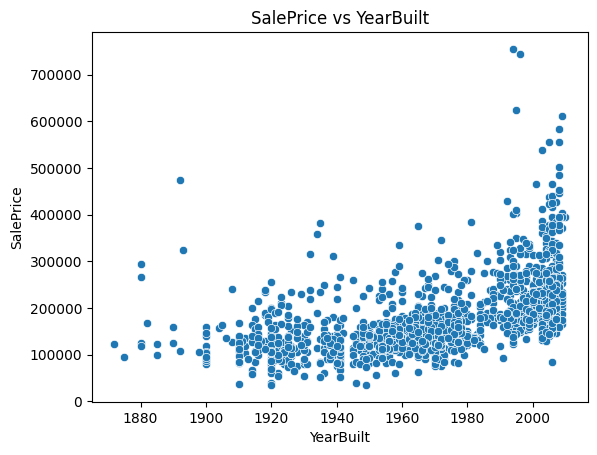

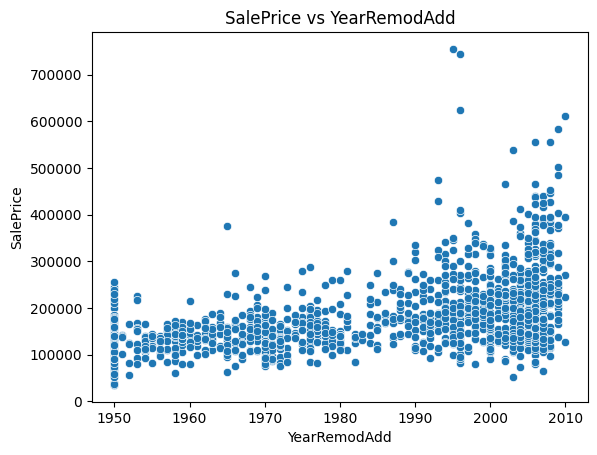

In [13]:
# Correlation matrix with target
corr = train[num_feats].corr()
print(corr['SalePrice'].sort_values(ascending=False).head(10))

# Heatmap of top correlated features
top_corr_features = corr['SalePrice'].abs().sort_values(ascending=False).index[1:11]
plt.figure(figsize=(10,8))
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Top 10 Features Correlation Heatmap")
plt.show()

# Scatter plots of top features vs target
for feat in top_corr_features:
    sns.scatterplot(x=train[feat], y=train['SalePrice'])
    plt.title(f"SalePrice vs {feat}")
    plt.show()


In [15]:
# For numeric columns: fill with median
for col in num_feats:
    if train[col].isnull().sum() > 0:
        median_val = train[col].median()
        train[col] = train[col].fillna(median_val)
        test[col] = test[col].fillna(median_val)

# For categorical columns: fill with mode
for col in cat_feats:
    if train[col].isnull().sum() > 0:
        mode_val = train[col].mode()[0]
        train[col] = train[col].fillna(mode_val)
        test[col] = test[col].fillna(mode_val)


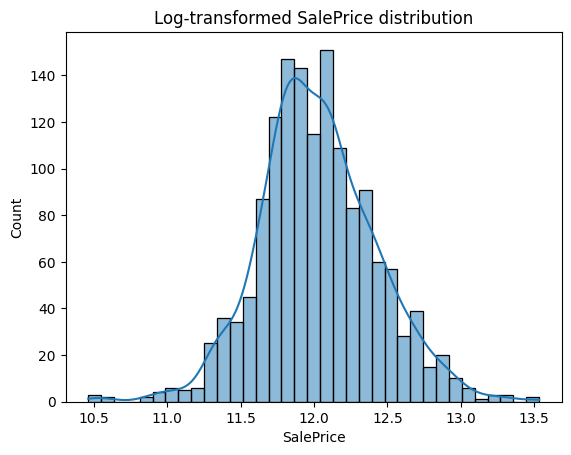

In [16]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(train['SalePrice'], kde=True)
plt.title("Log-transformed SalePrice distribution")
plt.show()


In [28]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

train['Age'] = train['YrSold'] - train['YearBuilt']
test['Age'] = test['YrSold'] - test['YearBuilt']

train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']
test['RemodAge'] = test['YrSold'] - test['YearRemodAdd']


In [29]:
combined = pd.concat([train, test], sort=False).reset_index(drop=True)

combined = pd.get_dummies(combined, columns=cat_feats, drop_first=True)

# Split back
train = combined.loc[:len(train)-1, :]
test = combined.loc[len(train):, :]

print(f"Train shape after encoding: {train.shape}")
print(f"Test shape after encoding: {test.shape}")


Train shape after encoding: (1460, 249)
Test shape after encoding: (1459, 249)


In [35]:
X = train.drop(['SalePrice', 'Id'], axis=1)  # ← all features except target and Id
y = train['SalePrice']                      # ← the target variable (log-transformed)


In [36]:
X = X.select_dtypes(include=[np.number])


In [37]:
X = X.fillna(0)  # or use median imputation if needed


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Split the data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42)

# Train RidgeCV model
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)

# Predict on validation set
y_val_pred_log = ridge.predict(X_val)

# Inverse-transform predictions and actual values if log1p was used
y_val_real = np.expm1(y_val)             # actual values
y_val_pred_real = np.expm1(y_val_pred_log)  # predicted values

# Compute evaluation metrics on original scale
mse = mean_squared_error(y_val_real, y_val_pred_real)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val_real, y_val_pred_real)
r2 = r2_score(y_val_real, y_val_pred_real)

# Print results
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation R² Score: {r2:.4f}")


Validation RMSE: 31936.96
Validation MAE: 20331.61
Validation R² Score: 0.8670


In [43]:
# Select same columns in test data and fill NaNs
X_test = test[X_reduced.columns].fillna(0)


In [44]:
y_test_pred_log = ridge.predict(X_test)


In [45]:
y_test_pred = np.expm1(y_test_pred_log)  # reverse np.log1p


In [48]:
y_true = np.expm1(y)

In [46]:
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': y_test_pred
})
submission.to_csv('submission.csv', index=False)


In [47]:
coef_df = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Coefficient': ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))


         Feature  Coefficient
3    OverallQual     0.092671
13      FullBath     0.071706
16  KitchenAbvGr    -0.062106
14      HalfBath     0.061957
20    GarageCars     0.056624
11  BsmtFullBath     0.054477
18    Fireplaces     0.051199
4    OverallCond     0.046035
17  TotRmsAbvGrd     0.035452
12  BsmtHalfBath     0.011183
